# 1.3 Nonlinear fit

Assume N data pairs ${Y_i,t_i}$ to which we model a function $g(\textbf{a} ,t_i)$ with an unknown M-component parameter vector $\textbf{a}$ is to be fitted.

Furthermore, assume that for each $t_i$ the data $Y_i$ are measured with errors $\varepsilon_i $ s.t. $<\varepsilon_i> =0$ and $<\varepsilon_i>^2 =\sigma_i^2$ 

In [412]:
import numpy as np
import scipy as scp
from scipy.stats import chi2
from scipy.optimize import curve_fit,minimize
import matplotlib.pyplot as plt
import random as rndb

#Generating the model with parameters a,om,phi,b
a = 1
om = 1
phi = 0
b = 0.1

#where N is the number of elements for the model data set
N = 11
#and M is the number of parameters
M = 4

The best set of parameters can be obtained by finding the components that minimize the quadratic deviation $\chi^2$, where $\chi^2(a) = $$\sum_{i=1}^{N} [\frac{Y_i - g(\textbf{a},t_i))}{\sigma_i}]^2 $$ $

In [413]:
def x2(data,model):
    result = 0
    for i in range(0,len(data)):
        result += (data[i]-model[i])**2 / np.var(data[i]-model[i])**2
    return result

Then, we define the theoretical model of the system

In [414]:
#theoretical model to be used
def model(t,a,om,phi,b):
    return a * np.sin(om*t+phi)* np.exp(-b*t)

Generating the system with the noise:

In [415]:
#where t is the independent variable
t = np.linspace(0,3*np.pi,N)
tmodel = np.linspace(0,3*np.pi,1000)

#we generate the y of the model and add the noise
noise = 0.4 * np.random.normal(size=t.size)
ydata =  model(t,a,om,phi,b)+noise -0.2
ymodel= model(tmodel,a,om,phi,b)


Plotting the data set, we get:

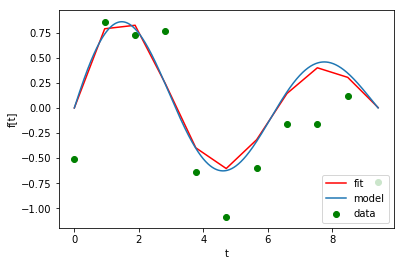

In [416]:
#Then, we plot the data
plt.scatter(t,ydata,label='data',color='green')

#and fit curves using a guided bound (a,1.1), (om,1.1), (phi,0.1), (b,0.2)
popt,pcov = curve_fit(model,t,ydata,bounds=(0,[1.1,1.1,.1,.2]))

plt.plot(t,model(t,*popt), 'r-',label="fit")#'fit: a=%5.3f, om=%5.3f, phi=%5.3f, b=%5.3f' % tuple(popt)
plt.plot(tmodel,ymodel,label='model')
plt.legend(loc='lower right')
plt.xlabel('t')
plt.ylabel('f[t]')
plt.show()

The parameters obtained from the bounded curvefit a, omega, phi, and b are:

In [417]:
print("a:",popt[0])
print("om:",popt[1])
print("phi:",popt[2])
print("b:",popt[3])

a: 1.0999999999999999
om: 0.9989522180710051
phi: 4.207545351719312e-24
b: 0.12719876227815963


In [418]:
#computing the error
error = model(t,a,om,phi,b) - model(t,*popt)
print(error)

[-4.62829989e-24 -5.25616966e-02 -3.59921660e-02 -6.48901765e-03
 -5.08243982e-03 -2.01867409e-02 -1.64090721e-02  1.60185876e-02
  4.75571873e-02  4.19234679e-02 -3.27556866e-03]


In [423]:
ydata /= max(ydata)
print(ydata)
error /= max(ydata)
print(error)
guess = np.array([1.1,1.1,.1,.2])
x0 = np.array([0,0])
def chisq(a):
    return np.sum(((ydata-model(t,a,om,phi,b))/error)**2)

result = minimize(chisq,x0)

[-0.59100045  1.          0.84233317  0.89480545 -0.73696102 -1.25875878
 -0.69100866 -0.19194814 -0.18069584  0.13833624 -0.86031031]
[-4.62829989e-24 -5.25616966e-02 -3.59921660e-02 -6.48901765e-03
 -5.08243982e-03 -2.01867409e-02 -1.64090721e-02  1.60185876e-02
  4.75571873e-02  4.19234679e-02 -3.27556866e-03]


ValueError: operands could not be broadcast together with shapes (2,) (11,) 

The $\chi^2$ is shown below.

In [ ]:
fig, ax = plt.subplots(1, 1)
df =7
x = np.linspace(0,20,1000)
ax.plot(x, chi2.pdf(x, df),label='chi2 pdf')
#plt.legend()
plt.ylabel("density")
plt.xlabel("$\chi^2$")
plt.xticks(range(0,25,5))
plt.xlim(-0.1,20)
plt.ylim(-0.001,0.13)
plt.show()

To obtain the confidence interval for the value of $\chi^2_o$ from 

In [ ]:
alpha = [0.05,0.95]
z = chi2.pdf(x,df)

print("IOC for alpha 5% to 95%:",np.percentile(z,[5,95]))

In [ ]:
x = np.linspace(0,20,1000)
rv = chi2(df)
plt.plot(x,rv.pdf(x))
r = chi2.rvs(df, size=1000)
b1,b2 = np.percentile(r,[5,95])
plt.hist(r, density=True, histtype='stepfilled', alpha=0.1,color='green')
plt.plot([b1]*50,np.linspace(0,max(rv.pdf(x)),50),'--',lw=0.5,label='bound 5%')
plt.plot([b2]*50,np.linspace(0,max(rv.pdf(x)),50),'--',lw=0.5,label='bound 95%')
plt.xlim(0,20)
plt.xlabel("$\chi^2$")
plt.ylabel("density")
plt.legend(loc='upper right')
plt.show()

print("IOC for alpha 5% to 95%:","(",b1,',',b2,')')

In [ ]:
N_8= 8
df = N_8 - M
x = np.linspace(0,20,N_)
rv = chi2(df)
plt.plot(x,rv.pdf(x))
plt.show()
plt.plot(x,(chi2.cdf(x,df)))